#### 패키지 불러오기

In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd

# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 로지스틱 회귀
from statsmodels.api import Logit

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# 워닝 제거 및 폰트 정의

import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = "AppleGothic" 

In [3]:
# 그래프 한글폰트 적용:맑은 고딕
# matplotlib.rc("font", family = "Malgun Gothic")

# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

#### (공통)사용자 함수 

In [4]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()
    #print(v_data.head()) <- Text format... 식별 불편
    # v_data.head()  <- 직접 적용 안됨

## 데이터 구성하기

In [5]:
df_raw = pd.read_csv("/home/piai/바탕화면/TAG 12~14 이상치/오대오.csv")
df_raw.head()

,Unnamed: 0,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
0,0,14.516590,3.727272,3.659474,64.386761,0.000000,10.879403,0.0,100.0,91.126781,...,40.107615,39.866318,39.867307,39.242749,0.045077,0.338026,0.199523,0.003820,46.439539,0
1,1,14.438721,3.863102,3.823411,0.370337,0.000000,0.019885,0.0,100.0,92.520378,...,40.061705,29.150599,0.000000,39.549413,0.060481,0.313373,0.098486,0.035789,94.234855,0
2,2,14.369410,3.819573,3.849695,122.368513,27.823089,0.096102,0.0,100.0,92.611488,...,39.910447,40.206674,40.657971,40.766664,0.489483,0.178890,0.051197,0.035789,64.669526,0
3,3,14.080565,3.913643,3.882729,227.436914,0.000000,35.740705,0.0,100.0,90.915691,...,33.887585,40.356547,39.592079,40.202029,0.264244,0.228764,0.009547,0.029205,48.615663,0
4,4,14.344228,3.676193,3.674700,76.245618,0.000000,12.329847,0.0,100.0,92.037182,...,40.347095,40.627034,39.046095,39.954925,0.193447,0.410250,0.027081,0.087180,49.166320,0


In [6]:
df_raw.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109440 entries, 0 to 109439
Columns: 140 entries, TAG_001 to cause
dtypes: float64(139), int64(1)
memory usage: 116.9 MB


In [8]:
# Data 구조 확인
fun_data_layout(df_raw)

Data 구조: (109440, 140)

변수 :  Index(['TAG_001', 'TAG_002', 'TAG_004', 'TAG_005', 'TAG_006', 'TAG_007',
       'TAG_008', 'TAG_011', 'TAG_012', 'TAG_013',
       ...
       'TAG_185', 'TAG_186', 'TAG_187', 'TAG_188', 'TAG_189', 'TAG_190',
       'TAG_191', 'TAG_192', 'TAG_193', 'cause'],
      dtype='object', length=140)



#### 데이터 분할

In [9]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_raw, # 데이터
                                     test_size = 0.3, # test 데이터의 비율
                                     random_state = 1234)  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (76608, 140)
test data size : (32832, 140)


## 로지스틱 회귀모델 및 회귀계수 검토

In [13]:
# from_formula 함수를 이용하여 변수 역할 지정
# 분석 대상 이벤트 = “1”

log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_008 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_022 +TAG_024 +TAG_027 +
TAG_031 +TAG_032 +TAG_033 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +TAG_046 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_065 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_084 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147 +TAG_148 +TAG_149 +TAG_150 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_160 +TAG_162 +TAG_163 +
TAG_164 +TAG_165 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_188 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.247516
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76468
Method:                           MLE   Df Model:                          139
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6429
Time:                        20:27:51   Log-Likelihood:                -18962.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    758.7432   5187.902      0.146      0.884   -9409.357    1.09e+04
TAG_001        1.2126      0.091     13.329      0.000       1.03

In [14]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_022 +TAG_024 +TAG_027 +
TAG_031 +TAG_032 +TAG_033 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +TAG_046 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_065 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_084 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147 +TAG_148 +TAG_149 +TAG_150 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_160 +TAG_162 +TAG_163 +
TAG_164 +TAG_165 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_188 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248360
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76469
Method:                           MLE   Df Model:                          138
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:28:22   Log-Likelihood:                -19026.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3681.3545   2941.589      1.251      0.211   -2084.053    9446.762
TAG_001        1.1690      0.091     12.893      0.000       0.99

In [15]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_022 +TAG_024 +TAG_027 +
TAG_031 +TAG_032 +TAG_033 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +TAG_046 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_084 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147 +TAG_148 +TAG_149 +TAG_150 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_160 +TAG_162 +TAG_163 +
TAG_164 +TAG_165 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_188 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248360
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76470
Method:                           MLE   Df Model:                          137
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:29:21   Log-Likelihood:                -19026.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3680.6862   2939.979      1.252      0.211   -2081.567    9442.940
TAG_001        1.1687      0.090     13.051      0.000       0.99

In [16]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_022 +TAG_024 +TAG_027 +
TAG_031 +TAG_032 +TAG_033 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +TAG_046 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_084 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_150 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_160 +TAG_162 +TAG_163 +
TAG_164 +TAG_165 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_188 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248360
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76471
Method:                           MLE   Df Model:                          136
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:30:09   Log-Likelihood:                -19026.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3679.3976   2940.339      1.251      0.211   -2083.562    9442.357
TAG_001        1.1687      0.090     13.057      0.000       0.99

In [17]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_022 +TAG_024 +TAG_027 +
TAG_032 +TAG_033 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +TAG_046 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_084 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_150 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_160 +TAG_162 +TAG_163 +
TAG_164 +TAG_165 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_188 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248360
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76472
Method:                           MLE   Df Model:                          135
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:30:35   Log-Likelihood:                -19026.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3680.7911   2939.109      1.252      0.210   -2079.756    9441.338
TAG_001        1.1686      0.089     13.065      0.000       0.99

In [19]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_022 +TAG_027 +
TAG_032 +TAG_033 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +TAG_046 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_084 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_150 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_160 +TAG_162 +TAG_163 +
TAG_164 +TAG_165 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_188 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248360
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76473
Method:                           MLE   Df Model:                          134
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:31:50   Log-Likelihood:                -19026.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3683.8259   2937.823      1.254      0.210   -2074.202    9441.854
TAG_001        1.1675      0.089     13.176      0.000       0.99

In [20]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_022 +TAG_027 +
TAG_032 +TAG_033 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +TAG_046 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_084 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_160 +TAG_162 +TAG_163 +
TAG_164 +TAG_165 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_188 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248361
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76474
Method:                           MLE   Df Model:                          133
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:32:32   Log-Likelihood:                -19026.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3686.9187   2930.923      1.258      0.208   -2057.584    9431.422
TAG_001        1.1640      0.088     13.258      0.000       0.99

In [21]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_022 +TAG_027 +
TAG_032 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +TAG_046 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_084 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_160 +TAG_162 +TAG_163 +
TAG_164 +TAG_165 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_188 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248361
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76475
Method:                           MLE   Df Model:                          132
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:33:24   Log-Likelihood:                -19026.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3681.3094   2933.371      1.255      0.209   -2067.991    9430.610
TAG_001        1.1643      0.088     13.268      0.000       0.99

In [22]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_022 +TAG_027 +
TAG_032 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_084 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_160 +TAG_162 +TAG_163 +
TAG_164 +TAG_165 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_188 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248361
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76476
Method:                           MLE   Df Model:                          131
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:33:58   Log-Likelihood:                -19026.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3655.6535   2937.878      1.244      0.213   -2102.481    9413.788
TAG_001        1.1640      0.088     13.265      0.000       0.99

In [23]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_022 +TAG_027 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_084 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_160 +TAG_162 +TAG_163 +
TAG_164 +TAG_165 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_188 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248362
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76477
Method:                           MLE   Df Model:                          130
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:34:38   Log-Likelihood:                -19027.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3667.5233   2930.295      1.252      0.211   -2075.749    9410.795
TAG_001        1.1633      0.088     13.264      0.000       0.99

In [24]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_022 +TAG_027 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_160 +TAG_162 +TAG_163 +
TAG_164 +TAG_165 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_188 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248363
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76478
Method:                           MLE   Df Model:                          129
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:35:33   Log-Likelihood:                -19027.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3666.2156   2929.883      1.251      0.211   -2076.249    9408.680
TAG_001        1.1629      0.088     13.260      0.000       0.99

In [25]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_022 +TAG_027 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_165 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_188 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248364
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76479
Method:                           MLE   Df Model:                          128
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:36:33   Log-Likelihood:                -19027.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3651.7064   2941.382      1.241      0.214   -2113.297    9416.710
TAG_001        1.1607      0.088     13.257      0.000       0.98

In [26]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_022 +TAG_027 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_165 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248367
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76480
Method:                           MLE   Df Model:                          127
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:37:08   Log-Likelihood:                -19027.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3647.6209   2956.444      1.234      0.217   -2146.903    9442.145
TAG_001        1.1607      0.088     13.260      0.000       0.98

In [27]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_027 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_165 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248370
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76481
Method:                           MLE   Df Model:                          126
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:37:43   Log-Likelihood:                -19027.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3646.2818   2946.460      1.238      0.216   -2128.674    9421.238
TAG_001        1.1680      0.087     13.426      0.000       0.99

In [28]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_020 +TAG_021 +TAG_027 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248376
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76482
Method:                           MLE   Df Model:                          125
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:38:19   Log-Likelihood:                -19028.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3649.3119   2942.927      1.240      0.215   -2118.719    9417.342
TAG_001        1.1664      0.087     13.413      0.000       0.99

In [29]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_021 +TAG_027 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_115 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248383
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76483
Method:                           MLE   Df Model:                          124
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6417
Time:                        20:38:57   Log-Likelihood:                -19028.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3644.1872   2939.640      1.240      0.215   -2117.402    9405.776
TAG_001        1.1604      0.087     13.372      0.000       0.99

In [30]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_021 +TAG_027 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_181 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248393
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76484
Method:                           MLE   Df Model:                          123
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6416
Time:                        20:39:23   Log-Likelihood:                -19029.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3653.6013   2919.198      1.252      0.211   -2067.922    9375.125
TAG_001        1.1675      0.087     13.487      0.000       0.99

In [31]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_021 +TAG_027 +TAG_034 +TAG_035 +TAG_038 +TAG_040 +TAG_041 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248471
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76485
Method:                           MLE   Df Model:                          122
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6415
Time:                        20:39:53   Log-Likelihood:                -19035.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3816.0399   2892.222      1.319      0.187   -1852.611    9484.691
TAG_001        1.1643      0.087     13.460      0.000       0.99

In [32]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +TAG_011 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_021 +TAG_027 +TAG_034 +TAG_035 +TAG_038 
+TAG_040 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.248482
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76486
Method:                           MLE   Df Model:                          121
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6415
Time:                        20:40:38   Log-Likelihood:                -19036.
converged:                      False   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3852.7802   2841.308      1.356      0.175   -1716.081    9421.641
TAG_001        1.1641      0.086     13.460      0.000       0.99

In [33]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_021 +TAG_027 +TAG_034 +TAG_035 +TAG_038 
+TAG_040 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_190 +TAG_191 +TAG_192 +TAG_193 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.248437
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76487
Method:                           MLE   Df Model:                          120
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6416
Time:                        20:41:14   Log-Likelihood:                -19032.
converged:                       True   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -253.7155     10.619    -23.893      0.000    -274.528    -232.903
TAG_001        1.1670      0

In [34]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_021 +TAG_027 +TAG_034 +TAG_035 +TAG_038 
+TAG_040 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_190 +TAG_191 +TAG_192  """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.248451
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76488
Method:                           MLE   Df Model:                          119
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6416
Time:                        20:41:39   Log-Likelihood:                -19033.
converged:                       True   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -252.5255     10.597    -23.830      0.000    -273.295    -231.756
TAG_001        1.1619      0

In [35]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_021 +TAG_027 +TAG_034 +TAG_035 +TAG_038 
+TAG_040 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_080 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_190 +TAG_192  """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.248464
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76489
Method:                           MLE   Df Model:                          118
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6415
Time:                        20:42:01   Log-Likelihood:                -19034.
converged:                       True   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -253.5340     10.584    -23.955      0.000    -274.278    -232.790
TAG_001        1.1616      0

In [36]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_018 +TAG_021 +TAG_027 +TAG_034 +TAG_035 +TAG_038 
+TAG_040 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_190 +TAG_192  """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.248478
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76490
Method:                           MLE   Df Model:                          117
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6415
Time:                        20:42:34   Log-Likelihood:                -19035.
converged:                       True   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -253.2972     10.589    -23.920      0.000    -274.052    -232.543
TAG_001        1.1471      0

In [37]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_021 +TAG_027 +TAG_034 +TAG_035 +TAG_038 
+TAG_040 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_190 +TAG_192  """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.248494
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76491
Method:                           MLE   Df Model:                          116
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6415
Time:                        20:43:07   Log-Likelihood:                -19037.
converged:                       True   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -252.9716     10.576    -23.919      0.000    -273.701    -232.242
TAG_001        1.1457      0

In [38]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_021 +TAG_027 +TAG_034 +TAG_035 +TAG_038 
+TAG_040 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_109 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_192  """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.248513
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76492
Method:                           MLE   Df Model:                          115
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6415
Time:                        20:43:55   Log-Likelihood:                -19038.
converged:                       True   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -253.4447     10.568    -23.982      0.000    -274.157    -232.732
TAG_001        1.1400      0

In [39]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_021 +TAG_027 +TAG_034 +TAG_035 +TAG_038 
+TAG_040 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_066 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_192  """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.248536
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76493
Method:                           MLE   Df Model:                          114
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6414
Time:                        20:44:28   Log-Likelihood:                -19040.
converged:                       True   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -253.8857     10.557    -24.050      0.000    -274.576    -233.195
TAG_001        1.1468      0

In [40]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_021 +TAG_027 +TAG_034 +TAG_035 +TAG_038 
+TAG_040 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_192  """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.248560
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76494
Method:                           MLE   Df Model:                          113
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6414
Time:                        20:45:03   Log-Likelihood:                -19042.
converged:                       True   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -252.9828     10.545    -23.991      0.000    -273.650    -232.315
TAG_001        1.1411      0

In [41]:
log_model = Logit.from_formula("""cause ~ TAG_001 +TAG_002 +TAG_004 +TAG_005 +TAG_006 +TAG_007 +
TAG_012 +TAG_013 +TAG_014 +TAG_015 +TAG_016 +TAG_017 +TAG_027 +TAG_034 +TAG_035 +TAG_038 
+TAG_040 +TAG_042 +TAG_043 +TAG_044 +
TAG_047 +TAG_048 +TAG_049 +TAG_050 +TAG_052 +TAG_054 +TAG_056 +TAG_057 +TAG_058 +TAG_060 +TAG_062 +TAG_063 +
TAG_064 +TAG_067 +TAG_068 +TAG_069 +TAG_070 +TAG_071 +TAG_072 +TAG_073 +TAG_074 +TAG_075 +
TAG_076 +TAG_077 +TAG_078 +TAG_079 +TAG_085 +TAG_087 +TAG_088 +TAG_089 +TAG_090 +TAG_099 +
TAG_100 +TAG_102 +TAG_103 +TAG_104 +TAG_105 +TAG_106 +TAG_107 +TAG_108 +TAG_110 +TAG_111 +TAG_112 +
TAG_114 +TAG_116 +TAG_118 +TAG_119 +TAG_122 +TAG_124 +TAG_127 +TAG_128 +TAG_129 +TAG_130 +TAG_132 +
TAG_135 +TAG_136 +TAG_137 +TAG_138 +TAG_139 +TAG_140 +TAG_141 +TAG_142 +TAG_143 +TAG_144 +TAG_145 +TAG_146 +
TAG_147+TAG_149 +TAG_152 +TAG_153 +TAG_154 +TAG_158 +TAG_159 +TAG_162 +TAG_163 +
TAG_164 +TAG_167 +TAG_168 +TAG_169 +TAG_170 +TAG_171 +TAG_172 +TAG_175 +TAG_177 +TAG_182 +
TAG_183 +TAG_184 +TAG_185 +TAG_186 +TAG_187 +TAG_189 +TAG_192  """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.248582
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:                76608
Model:                          Logit   Df Residuals:                    76495
Method:                           MLE   Df Model:                          112
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.6414
Time:                        20:45:36   Log-Likelihood:                -19043.
converged:                       True   LL-Null:                       -53101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -251.2950     10.497    -23.941      0.000    -271.868    -230.722
TAG_001        1.1259      0

## 예측 및 성능 평가

#### 예측

In [42]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)

# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["cause"], y_pred_train_class)),"\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)

# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(),"\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["cause"],y_pred_test_class)),"\n")

Train 예측 결과 
 67685     0
12766     0
31718     0
593       1
103408    1
dtype: int64 

Confusion Matrix: 
[[35427  2843]
 [ 4797 33541]] 

Test 예측 결과 
 36589    0
6660     0
5523     0
7659     0
27535    0
dtype: int64 

Confusion Matrix: 
[[15209  1241]
 [ 2143 14239]] 



In [43]:
# 0과 1의 값을 가진 class로 변환: 임계값 변경-> 예측 빈도 달라짐
# y_pred_test_class = (y_pred_test > 0.6).astype(int)
# print("Test 예측 결과-임계값 변경 \n", y_pred_test_class.head(), "\n")
# print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["BAD"],y_pred_test_class)),"\n")

#### 평가

In [44]:
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["cause"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["cause"],y_pred_train_class)),"\n")
print(classification_report(df_train["cause"], y_pred_train_class, digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["cause"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["cause"],y_pred_test_class)),"\n")
print(classification_report(df_test["cause"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.900

Confusion Matrix: 
[[35427  2843]
 [ 4797 33541]] 

              precision    recall  f1-score   support

           0      0.881     0.926     0.903     38270
           1      0.922     0.875     0.898     38338

    accuracy                          0.900     76608
   macro avg      0.901     0.900     0.900     76608
weighted avg      0.901     0.900     0.900     76608

Test 예측/분류 결과
Accuracy: 0.897

Confusion Matrix: 
[[15209  1241]
 [ 2143 14239]] 

              precision    recall  f1-score   support

           0      0.876     0.925     0.900     16450
           1      0.920     0.869     0.894     16382

    accuracy                          0.897     32832
   macro avg      0.898     0.897     0.897     32832
weighted avg      0.898     0.897     0.897     32832



#### 목표변수 label 지정

In [45]:
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print("Train 예측/분류 결과")

# print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))
print(classification_report(df_test["cause"], y_pred_test_class, target_names=['정상', '불량중지'], digits=3))

print("Test 예측/분류 결과")
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
# print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))
print(classification_report(df_test["cause"], y_pred_test_class, target_names=['정상', '불량중지'], digits=3))

Train 예측/분류 결과
              precision    recall  f1-score   support

          정상      0.876     0.925     0.900     16450
        불량중지      0.920     0.869     0.894     16382

    accuracy                          0.897     32832
   macro avg      0.898     0.897     0.897     32832
weighted avg      0.898     0.897     0.897     32832

Test 예측/분류 결과
              precision    recall  f1-score   support

          정상      0.876     0.925     0.900     16450
        불량중지      0.920     0.869     0.894     16382

    accuracy                          0.897     32832
   macro avg      0.898     0.897     0.897     32832
weighted avg      0.898     0.897     0.897     32832



## 결론 도출

<AxesSubplot:>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


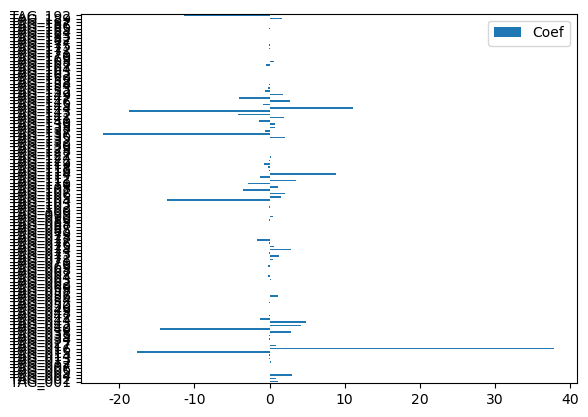

In [46]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")
# df_logistic_coef.plot.barh(y = "Coef", figsize=(10,6))

#### 표준화 회귀 계수

In [47]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char],axis = 1)
df_scaled.head()

,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,TAG_013,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
0,0.216596,0.054474,-0.452474,-0.940043,-0.572529,0.104948,-0.118705,0.012114,-0.423594,-1.559539,...,0.467052,0.182057,0.465136,0.098734,-1.087988,1.125972,6.600369,-1.275388,-0.400098,-1.0
1,0.035256,1.046411,0.729001,-1.789895,-0.572529,-0.654134,-0.118705,0.012114,1.177593,1.513367,...,0.462343,-0.973282,-2.767366,0.123942,-0.942780,0.841634,2.582715,-0.076066,2.117640,-1.0
2,-0.126154,0.728530,0.918422,-0.170304,2.019939,-0.648806,-0.118705,0.012114,1.282274,0.963397,...,0.446828,0.218753,0.529244,0.224001,3.101222,-0.709452,0.702284,-0.076066,0.560212,-1.0
3,-0.798806,1.415509,1.156492,1.224535,-0.572529,1.842755,-0.118705,0.012114,-0.666127,0.224883,...,-0.170951,0.234912,0.442820,0.177588,0.977996,-0.134221,-0.953879,-0.323061,-0.285466,-1.0
4,-0.184796,-0.318548,-0.342745,-0.782610,-0.572529,0.206334,-0.118705,0.012114,0.622420,0.196295,...,0.491616,0.264075,0.398551,0.157275,0.310631,1.958988,-0.256649,1.851826,-0.256458,-1.0


In [48]:
# BAD 데이터를 0과 1로 변환, np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled['cause'] = np.where(df_scaled["cause"]> 0, 1, 0)
df_scaled.head()

,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,TAG_013,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
0,0.216596,0.054474,-0.452474,-0.940043,-0.572529,0.104948,-0.118705,0.012114,-0.423594,-1.559539,...,0.467052,0.182057,0.465136,0.098734,-1.087988,1.125972,6.600369,-1.275388,-0.400098,0
1,0.035256,1.046411,0.729001,-1.789895,-0.572529,-0.654134,-0.118705,0.012114,1.177593,1.513367,...,0.462343,-0.973282,-2.767366,0.123942,-0.942780,0.841634,2.582715,-0.076066,2.117640,0
2,-0.126154,0.728530,0.918422,-0.170304,2.019939,-0.648806,-0.118705,0.012114,1.282274,0.963397,...,0.446828,0.218753,0.529244,0.224001,3.101222,-0.709452,0.702284,-0.076066,0.560212,0
3,-0.798806,1.415509,1.156492,1.224535,-0.572529,1.842755,-0.118705,0.012114,-0.666127,0.224883,...,-0.170951,0.234912,0.442820,0.177588,0.977996,-0.134221,-0.953879,-0.323061,-0.285466,0
4,-0.184796,-0.318548,-0.342745,-0.782610,-0.572529,0.206334,-0.118705,0.012114,0.622420,0.196295,...,0.491616,0.264075,0.398551,0.157275,0.310631,1.958988,-0.256649,1.851826,-0.256458,0


## End of 로지스틱회귀